# **INF398 Tema1 - Overfitting**
 
Como hemos discutido, un algoritmo de aprendizaje cae en overfitting cuando su desempeño en los datos de entrenamiento (datos conocidos) difiere significativamente del error que vemos en datos nuevos (pruebas). **Típicamente sucede que el error de entrenamiento es muy bajo pero el error de pruebas es alto** (el algoritmo ``memoriza'' los datos de entrenamiento pero no aprende nada).

En este breve ejemplo mostramos (i) que es muy fácil que eso ocurra y (ii) que la probabilidad de que eso ocurra depende de la relación entre la ``capacidad'' de la hipótesis implementada por la máquina y el número de datos disponibles.



![texto alternativo](https://github.com/JRICARDON/jricardon.github.io/blob/master/spambase/over.jpg?raw=trues)




## **Datos**

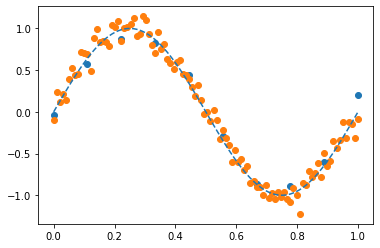

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import math

def f(x):
    return np.sin(2.0*math.pi*x)

n=10
x = np.linspace(0, 1, n)
noise = np.random.normal(loc=0.0, scale=0.1, size=n)

y = f(x) + noise

x = x[:, np.newaxis]

m=100
x_test = np.linspace(0, 1, m)
noise_test = np.random.normal(loc=0.0, scale=0.1, size=m)
y_test = f(x_test) + noise_test
x_test = x_test[:, np.newaxis] 

m=100
x_plot = np.linspace(0, 1, m)
x_plot = x_plot[:, np.newaxis]
plt.scatter(x[:,0], y, label="training points")
plt.scatter(x_test[:,0], y_test, label="test points")
plt.plot(x_plot[:,0], f(x_plot), '--', label="target")
plt.show()



## Modelo

In [ ]:
degree=15

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(x, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## Entrenamiento

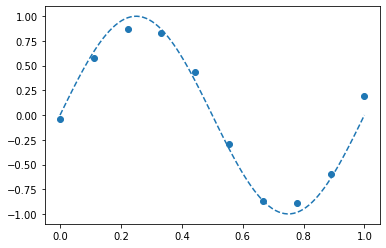

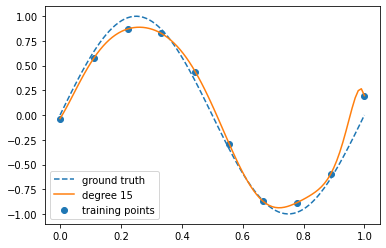

In [ ]:
m=100
x_plot = np.linspace(0, 1, m)
x_plot = x_plot[:, np.newaxis]
plt.scatter(x[:,0], y, label="training points")
plt.plot(x_plot[:,0], f(x_plot), '--', label="ground truth")
plt.show()

y_plot = model.predict(x_plot)
plt.scatter(x[:,0], y, label="training points")
plt.plot(x_plot[:,0], f(x_plot), '--', label="ground truth")
plt.plot(x_plot[:,0], y_plot, '-', label="degree %d" % degree)

plt.legend(loc='lower left')
plt.show()


In [ ]:
import numpy as np
1.0/(1+np.exp(-2.5))

0.9241418199787566

## Evaluación


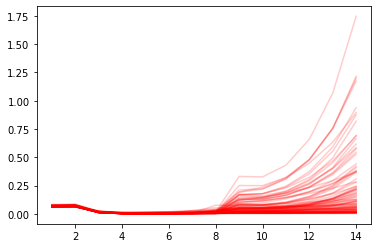

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import math


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x*np.sin(2.0*math.pi*x)

def sim():

  MSE=[]
  x = np.linspace(0, 1, 10)
  noise = np.random.normal(loc=0.0, scale=0.1, size=10)
  #print(noise.shape)
  y = f(x) + noise

  # create matrix versions of these arrays
  #print(x.shape)
  X = x[:, np.newaxis]
  #print(X.shape)

  # generate points used to plot
  x_test = np.linspace(0, 1, 100)
  X_test = x_test[:, np.newaxis]

  degrees=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14]

  for degree in degrees:
      model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
      model.fit(X, y)
      y_pred = model.predict(X_test)
      y_test = f(x_test)
      error = np.mean((y_pred - y_test)**2)
      MSE.append(error)
      #print("DEGREE=%d,MSE=%f"%(degree,error))
      #plt.scatter(x, y, label="training points")
      #plt.plot(x_test, y_test, '--', label="ground truth")
      #plt.plot(x_test, y_pred, label="degree %d" % degree)
      #plt.show()

  plt.plot(degrees,MSE,'r-',alpha=0.2)

for idx in range(100):
  sim()


plt.show()
